# Practicel ML - KNN

### Full Name : 
### Student Number : 

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [3]:
len(df)

1102

Measure the number of unique values for each column. Note that Attrition is the target column.

In [4]:
for col in df.columns:
    if col == "Attrition":
        continue
    print(f"number of unique values in {col} = {df[col].nunique()}")

number of unique values in Age = 43
number of unique values in BusinessTravel = 3
number of unique values in DailyRate = 736
number of unique values in Department = 3
number of unique values in DistanceFromHome = 29
number of unique values in Education = 5
number of unique values in EducationField = 6
number of unique values in EmployeeCount = 1
number of unique values in EmployeeNumber = 1102
number of unique values in EnvironmentSatisfaction = 4
number of unique values in Gender = 2
number of unique values in HourlyRate = 71
number of unique values in JobInvolvement = 4
number of unique values in JobLevel = 5
number of unique values in JobRole = 9
number of unique values in JobSatisfaction = 4
number of unique values in MaritalStatus = 3
number of unique values in MonthlyIncome = 1027
number of unique values in MonthlyRate = 1082
number of unique values in NumCompaniesWorked = 10
number of unique values in Over18 = 1
number of unique values in OverTime = 2
number of unique values in 

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [5]:
print(len(df.columns))
for col in df.columns:
    if col == "Attrition":
        continue
    if df[col].nunique() < 2:
        print(f"dropping {col}")
        df.drop(columns=col, inplace=True)
print(len(df.columns))

35
dropping EmployeeCount
dropping Over18
dropping StandardHours
32


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [6]:
print(df["BusinessTravel"].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [7]:
df['btvalue'] = df['BusinessTravel'].apply(lambda x: 0 if x == "Non-Travel" else 1 if x == "Travel_Rarely" else 2)
df.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,btvalue
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,2,0,11,2,3,3,2,1,2,1
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,1,0,15,5,3,1,0,0,0,1
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,4,0,15,2,3,13,9,3,12,1
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,1,0,7,5,3,7,7,0,7,1
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,4,0,10,2,2,10,7,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,No,Non-Travel,301,Sales,15,4,Marketing,2036,4,...,1,1,15,4,2,15,12,11,11,0
96,35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,2040,3,...,3,0,9,2,3,9,0,1,7,1
97,35,No,Travel_Rarely,1276,Research & Development,16,3,Life Sciences,586,4,...,3,0,10,2,3,8,7,0,0,1
98,40,No,Travel_Rarely,611,Sales,7,4,Medical,1740,2,...,2,0,21,3,2,21,8,12,8,1


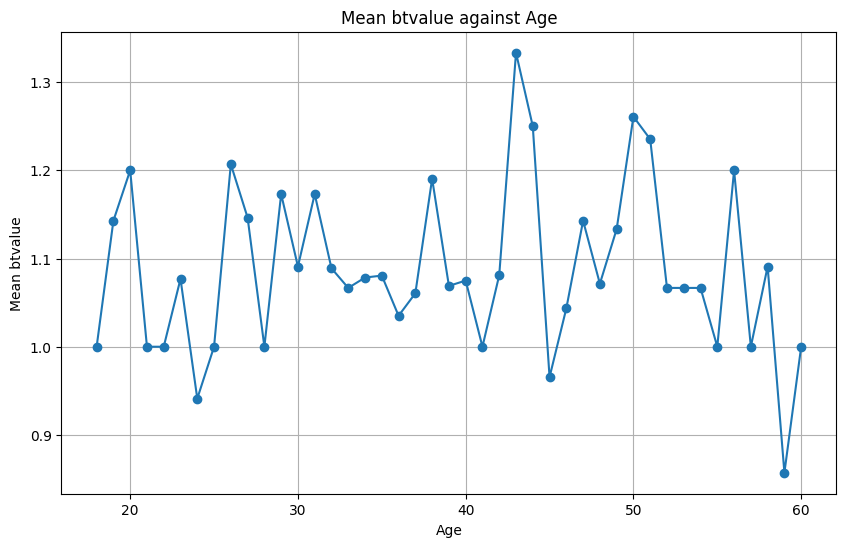

In [8]:
mean_btvalue = df.groupby('Age')['btvalue'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_btvalue.index, mean_btvalue.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Mean btvalue')
plt.title('Mean btvalue against Age')
plt.grid(True)
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

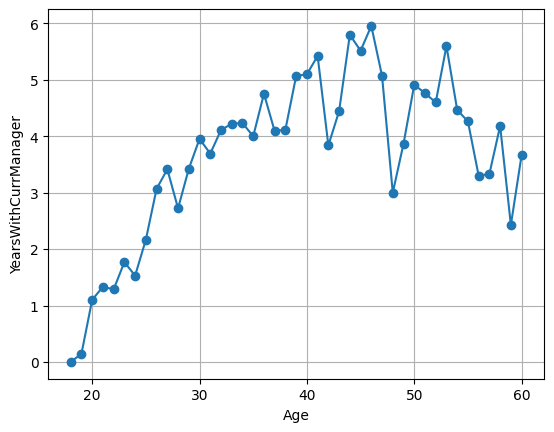

In [9]:
mean_years_with_curr_manager = df.groupby('Age')['YearsWithCurrManager'].mean()

plt.plot(mean_years_with_curr_manager.index, mean_years_with_curr_manager.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('YearsWithCurrManager')
plt.grid(True)
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

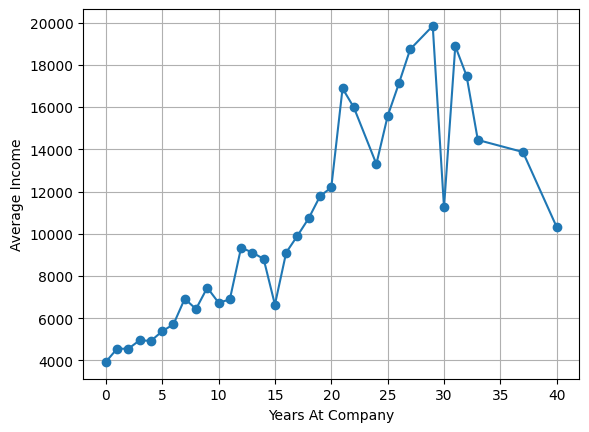

Age: int64
Attrition: object
BusinessTravel: object
DailyRate: int64
Department: object
DistanceFromHome: int64
Education: int64
EducationField: object
EmployeeNumber: int64
EnvironmentSatisfaction: int64
Gender: object
HourlyRate: int64
JobInvolvement: int64
JobLevel: int64
JobRole: object
JobSatisfaction: int64
MaritalStatus: object
MonthlyIncome: int64
MonthlyRate: int64
NumCompaniesWorked: int64
OverTime: object
PercentSalaryHike: int64
PerformanceRating: int64
RelationshipSatisfaction: int64
StockOptionLevel: int64
TotalWorkingYears: int64
TrainingTimesLastYear: int64
WorkLifeBalance: int64
YearsAtCompany: int64
YearsInCurrentRole: int64
YearsSinceLastPromotion: int64
YearsWithCurrManager: int64
btvalue: int64


In [10]:
mean_inc_years = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()

plt.plot(mean_inc_years.index, mean_inc_years.values, marker='o', linestyle='-')
plt.xlabel('Years At Company')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

for col in df.columns:
    print(f"{col}: {df[col].dtype}")

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [11]:
le = LabelEncoder()
new_df = pd.DataFrame()

for col in df.columns:
    new_df[col] = le.fit_transform(df[col]) if df[col].dtype == 'object' else df[col]

new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,btvalue
0,29,0,2,592,1,7,3,1,1883,4,...,2,0,11,2,3,3,2,1,2,1
1,36,0,2,884,2,1,4,1,1585,2,...,1,0,15,5,3,1,0,0,0,1
2,34,0,2,1326,2,3,3,4,1478,4,...,4,0,15,2,3,13,9,3,12,1
3,27,0,2,954,2,9,3,2,1965,4,...,1,0,7,5,3,7,7,0,7,1
4,32,0,2,929,2,10,3,2,722,4,...,4,0,10,2,2,10,7,0,8,1


In [12]:
y = new_df['Attrition'].to_numpy()
X = new_df.drop(columns='Attrition').to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# lens of train and validation datasets
print(len(y_train))
print(len(y_test))
# TODO

881
221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [14]:
# is done in previous cells


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$**


In [15]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



# Evaluation
  

Define the model and train it.

In [16]:
knn = KNN(k=4)

knn.fit(X_train, y_train)

Predict the y_train and y_test values.

In [17]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

print(np.sum(np.array(y_train) == np.array(train_pred)) / len(y_train))
print(np.sum(np.array(y_test) == np.array(test_pred)) / len(y_test))

0.9171396140749148
0.7601809954751131


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Now predict the defined model on test data and return the accuracy

In [19]:
predictions = knn.predict(X_test)
print(np.sum(np.array(y_test) == np.array(predictions)) / len(y_test))

0.8190045248868778


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**